# Inu_Neko Market Data Analysis

In [1]:
#Importing all the necessary pythone library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
inu_neko = pd.read_csv("inu_neko.csv")
inu_neko.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10316740,575410882303,1014557,2021-05-26 12:57:07.490008,2021,5,26,26,1,19,New York,21.95,Chomp-a Plush,toy,dog,NaN,0
1,10308775,719638485153,1008476,2021-04-18 12:59:58.120489,2021,4,18,18,1,37,New York,72.99,Cat Cave,bedding,cat,NaN,0
2,10313982,287663658863,1012552,2021-05-14 14:23:52.375544,2021,5,14,14,1,35,New Jersey,9.95,All Veggie Yummies,treat,dog,NaN,0
3,10311897,521244155990,1010940,2021-05-04 08:25:25.905636,2021,5,4,4,1,39,Mississippi,54.95,Reddy Beddy,bedding,dog,small,0
4,10315882,287663658863,1013961,2021-05-22 11:55:36.733048,2021,5,22,22,1,25,Florida,9.95,All Veggie Yummies,treat,dog,NaN,0


In [3]:
#checking the shape of the datset
inu_neko.shape

(24020, 17)

In [4]:
inu_neko.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_quantity', 'cust_age',
       'cust_state', 'prod_price', 'prod_title', 'prod_category',
       'prod_animal_type', 'prod_size', 'total_sales'],
      dtype='object')

In [5]:
#looking throug the data to check the 
# missing values
missing_values = inu_neko.isnull().sum()
missing_values

trans_id                0
prod_upc                0
cust_id                 0
trans_timestamp         0
trans_year              0
trans_month             0
trans_day               0
trans_hour              0
trans_quantity          0
cust_age                0
cust_state              0
prod_price              0
prod_title              0
prod_category           0
prod_animal_type        0
prod_size           19305
total_sales             0
dtype: int64

In [6]:
#Checing the informations in the dataset
inu_neko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24020 entries, 0 to 24019
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          24020 non-null  int64  
 1   prod_upc          24020 non-null  int64  
 2   cust_id           24020 non-null  int64  
 3   trans_timestamp   24020 non-null  object 
 4   trans_year        24020 non-null  int64  
 5   trans_month       24020 non-null  int64  
 6   trans_day         24020 non-null  int64  
 7   trans_hour        24020 non-null  int64  
 8   trans_quantity    24020 non-null  int64  
 9   cust_age          24020 non-null  int64  
 10  cust_state        24020 non-null  object 
 11  prod_price        24020 non-null  float64
 12  prod_title        24020 non-null  object 
 13  prod_category     24020 non-null  object 
 14  prod_animal_type  24020 non-null  object 
 15  prod_size         4715 non-null   object 
 16  total_sales       24020 non-null  int64 

In [7]:
#checking for duplicate rows
dup_rows = inu_neko.duplicated().sum()
dup_rows

263

In [8]:
#removing the duplicates
inu_neko_cleaned = inu_neko[~inu_neko.duplicated()]
inu_neko_cleaned.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10316740,575410882303,1014557,2021-05-26 12:57:07.490008,2021,5,26,26,1,19,New York,21.95,Chomp-a Plush,toy,dog,NaN,0
1,10308775,719638485153,1008476,2021-04-18 12:59:58.120489,2021,4,18,18,1,37,New York,72.99,Cat Cave,bedding,cat,NaN,0
2,10313982,287663658863,1012552,2021-05-14 14:23:52.375544,2021,5,14,14,1,35,New Jersey,9.95,All Veggie Yummies,treat,dog,NaN,0
3,10311897,521244155990,1010940,2021-05-04 08:25:25.905636,2021,5,4,4,1,39,Mississippi,54.95,Reddy Beddy,bedding,dog,small,0
4,10315882,287663658863,1013961,2021-05-22 11:55:36.733048,2021,5,22,22,1,25,Florida,9.95,All Veggie Yummies,treat,dog,NaN,0


In [9]:
#Checing the unique valuesin the customer's state
inu_neko_cleaned["cust_state"].unique()

array(['New York', 'New Jersey', 'Mississippi', 'Florida', 'Pennsylvania',
       'Connecticut', 'California', 'Oregon', 'Ohio', 'Wisconsin',
       'South Carolina', 'Nevada', 'Illinois', 'New Mexico', 'Texas',
       'Virginia', 'Nebraska', 'Massachusetts', 'North Carolina',
       'Missouri', 'Maryland', 'Washington', 'Georgia', 'Colorado',
       'South Dakota', 'Alabama', 'Kentucky', 'Arizona', 'Michigan',
       'Utah', 'Louisiana', 'Delaware', 'Minnesota', 'Idaho', 'Arkansas',
       'CA', 'Hawaii', 'Rhode Island', 'New Hampshire',
       'District of Columbia', 'Indiana', 'North Dakota', 'Iowa',
       'West Virginia', 'Tennessee', 'Montana', 'Kansas', 'Oklahoma',
       'Maine', 'Alaska', 'Vermont', 'FL', 'Wyoming', 'AL', 'NY'],
      dtype=object)

In [10]:
#replacing the abbreviated state to its full name
inu_neko_cleaned = inu_neko_cleaned.replace(["CA","FL","AL","NY"],["California","Florida","Alabama","New York"])
inu_neko_cleaned["cust_state"].unique()

array(['New York', 'New Jersey', 'Mississippi', 'Florida', 'Pennsylvania',
       'Connecticut', 'California', 'Oregon', 'Ohio', 'Wisconsin',
       'South Carolina', 'Nevada', 'Illinois', 'New Mexico', 'Texas',
       'Virginia', 'Nebraska', 'Massachusetts', 'North Carolina',
       'Missouri', 'Maryland', 'Washington', 'Georgia', 'Colorado',
       'South Dakota', 'Alabama', 'Kentucky', 'Arizona', 'Michigan',
       'Utah', 'Louisiana', 'Delaware', 'Minnesota', 'Idaho', 'Arkansas',
       'Hawaii', 'Rhode Island', 'New Hampshire', 'District of Columbia',
       'Indiana', 'North Dakota', 'Iowa', 'West Virginia', 'Tennessee',
       'Montana', 'Kansas', 'Oklahoma', 'Maine', 'Alaska', 'Vermont',
       'Wyoming'], dtype=object)

In [11]:
#checkingthe unique values in the product price
inu_neko_cleaned["prod_price"].unique()

array([2.195000e+01, 7.299000e+01, 9.950000e+00, 5.495000e+01,
       1.999000e+01, 2.845000e+01, 1.097000e+01, 3.598000e+01,
       1.297000e+01, 3.599000e+01, 1.099000e+01, 3.299000e+01,
       4.599000e+01, 6.099000e+01, 2.495000e+01, 1.895000e+01,
       1.599000e+01, 4.895000e+01, 2.299000e+01, 6.599000e+01,
       1.299000e+01, 8.675309e+06])

In [12]:
for item in inu_neko_cleaned["prod_price"]:
    if item > 100:
        print(item)

8675309.0


### Observation
The Product price is less than or equal to 100<br>
but there is a row where the product price is greater than 100<br>
so we will look for the row and delete it.

In [13]:
inu_neko_cleaned= inu_neko_cleaned.drop(inu_neko_cleaned[inu_neko_cleaned["prod_price"]>100].index)
inu_neko_cleaned["prod_price"].unique()

array([21.95, 72.99,  9.95, 54.95, 19.99, 28.45, 10.97, 35.98, 12.97,
       35.99, 10.99, 32.99, 45.99, 60.99, 24.95, 18.95, 15.99, 48.95,
       22.99, 65.99, 12.99])

The total sales column is all 0s so we will be sorting that out<br>
by multiplying the product price column with that of transaction quantities

In [14]:
inu_neko_cleaned["total_sales"] = inu_neko_cleaned["prod_price"]*inu_neko_cleaned["trans_quantity"]
inu_neko_cleaned.head(10)

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10316740,575410882303,1014557,2021-05-26 12:57:07.490008,2021,5,26,26,1,19,New York,21.95,Chomp-a Plush,toy,dog,NaN,21.95
1,10308775,719638485153,1008476,2021-04-18 12:59:58.120489,2021,4,18,18,1,37,New York,72.99,Cat Cave,bedding,cat,NaN,72.99
2,10313982,287663658863,1012552,2021-05-14 14:23:52.375544,2021,5,14,14,1,35,New Jersey,9.95,All Veggie Yummies,treat,dog,NaN,9.95
3,10311897,521244155990,1010940,2021-05-04 08:25:25.905636,2021,5,4,4,1,39,Mississippi,54.95,Reddy Beddy,bedding,dog,small,54.95
4,10315882,287663658863,1013961,2021-05-22 11:55:36.733048,2021,5,22,22,1,25,Florida,9.95,All Veggie Yummies,treat,dog,NaN,9.95
5,10304083,344538897332,1004553,2021-03-15 06:54:04.394363,2021,3,15,15,1,23,Pennsylvania,19.99,Feline Fix Mix,treat,cat,NaN,19.99
6,10302524,441530839394,1003206,2021-02-26 09:53:54.769593,2021,2,26,26,2,23,Connecticut,28.45,Ball and String,toy,cat,NaN,56.90
7,10306020,374613020864,1006211,2021-03-31 11:24:22.552751,2021,3,31,31,1,21,New Jersey,10.97,Chewie Dental,treat,dog,NaN,10.97
8,10311825,344538897332,1010883,2021-05-04 11:27:31.070711,2021,5,4,4,2,26,New York,19.99,Feline Fix Mix,treat,cat,NaN,39.98
9,10311575,704772572943,1010687,2021-05-03 13:49:16.108636,2021,5,3,3,1,33,Connecticut,35.98,Scratchy Post,toy,cat,NaN,35.98


In [15]:
#Chexking for missing values
num_nans = inu_neko_cleaned.isnull().sum()
num_nans

trans_id                0
prod_upc                0
cust_id                 0
trans_timestamp         0
trans_year              0
trans_month             0
trans_day               0
trans_hour              0
trans_quantity          0
cust_age                0
cust_state              0
prod_price              0
prod_title              0
prod_category           0
prod_animal_type        0
prod_size           19094
total_sales             0
dtype: int64

In [16]:
#drop the column with issing values
inu_neko_cleaned = inu_neko_cleaned.drop("prod_size",axis=1)
inu_neko_cleaned.isnull().sum()

trans_id            0
prod_upc            0
cust_id             0
trans_timestamp     0
trans_year          0
trans_month         0
trans_day           0
trans_hour          0
trans_quantity      0
cust_age            0
cust_state          0
prod_price          0
prod_title          0
prod_category       0
prod_animal_type    0
total_sales         0
dtype: int64

### Observations
The dataset have been cleaned from all the missing values,<br>
null values nd the null column have been removed.<br>
the row with an exaggerated product price has been removed.<BR>
Therefore the dataset is decleared to be a **CLEANED DATASET**<br>
and can now be use in the inu + neko market analysis

### Exploratory data analysis

In [17]:
#Checking the number of transacions or order in the dataset
num_trans = len(inu_neko_cleaned[~inu_neko_cleaned["trans_id"].duplicated()])
num_trans

17416

In [18]:
#Checking for the unique values in the month and day of the dataset
print(inu_neko_cleaned["trans_month"].unique())
inu_neko_cleaned["trans_day"].unique()

[5 4 3 2 1]


array([26, 18, 14,  4, 22, 15, 31,  3, 19,  5, 24,  8, 11, 30, 25, 27, 29,
       13, 21, 23, 16, 12, 17,  2,  9, 20,  6, 28, 10,  7,  1],
      dtype=int64)

In [19]:
#Checking for the month and day of the first sale
first_date =(inu_neko_cleaned["trans_month"][0],inu_neko_cleaned["trans_day"][0])
first_date

(5, 26)

In [20]:
#Checking for the month and day of the last sale
last_date = (inu_neko_cleaned["trans_month"].iloc[-1],inu_neko_cleaned["trans_day"].iloc[-1])
last_date

(5, 7)

In [21]:
#Checking for the most popular product animal type
most_pop = "dog" if (inu_neko_cleaned["prod_animal_type"]=="dog").sum() > (inu_neko_cleaned["prod_animal_type"]=="cat").sum() else "cat"
most_pop

'cat'

<AxesSubplot:xlabel='trans_month', ylabel='count'>

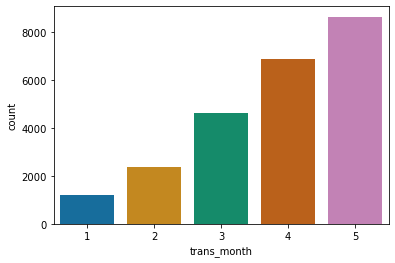

In [22]:
#comparing the total transactions in every month to know the month with the maximum sales
sns.countplot(inu_neko_cleaned["trans_month"], palette ='colorblind')

**from observation the total transaction increase with month.**

In [24]:
# Checking for the average number of items bought in each transaction
avg_num_items =sum(inu_neko_cleaned["trans_quantity"])/len(inu_neko_cleaned["trans_id"].unique())
avg_num_items

1.8820050528249885

In [25]:
#the top ten product titles by total dollar amount made
top_tot_sales = inu_neko_cleaned.groupby(["prod_title"]).sum().sort_values("total_sales",ascending = False)
top_tot_sales = top_tot_sales["total_sales"]
top_tot_sales = dict(top_tot_sales.nlargest(10))
top_tot_sales.keys()

dict_keys(['Reddy Beddy', 'Cat Cave', 'Kitty Climber', 'Snoozer Hammock', 'Snoozer Essentails', 'Yum Fish-Dish', 'Feline Fix Mix', 'Scratchy Post', 'Foozy Mouse', 'Tuna Tasties'])

In [26]:
#the top ten product titles by the total number of items sold for that product
top_num_sales = inu_neko_cleaned.groupby(["prod_title"]).sum().sort_values("trans_quantity",ascending = False)
top_num_sales = top_num_sales["trans_quantity"]
top_num_sales = dict(top_num_sales.nlargest(10))
top_num_sales.keys()

dict_keys(['Reddy Beddy', 'Yum Fish-Dish', 'Feline Fix Mix', 'Kitty Climber', 'Tuna Tasties', 'Chewie Dental', 'Cat Cave', 'Purrfect Puree', 'Whole Chemistry Recipe', 'Snoozer Hammock'])